## Importing Libraries

In [112]:
import scipy
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats import power
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest, proportion_confint, binom_test, proportions_chisquare, proportion_effectsize

__Example 9.3.4__ The workers union of a large corporation in a big metropolitan city demands that each worker should be compensated for travel time to work since it takes, on the average, at least 75 minutes for each worker to travel to his/her job. However, the director of human resources believes otherwise and he took a random sample of 16 workers and found that the average traveling time for these workers is 68 minutes. Assume that from past experience the director knows that travel times are normally distributed (in applications this condition must be verified) with a standard deviation σ= 10 minutes. Do these data provide sufficient evidence to support the directors’s claim? Use α = 0.05. Find the p-value. Find the size of the probability of the type II error β if the true travel time is µ = 72 minutes.

In [2]:
"""
We can make our own function to output the z-score and 
the corresponding p-value.
"""

def one_samp_z_test_from_stats(samp_mean, sigma, n, alternative, mu, conf_level):
    z_score =  (samp_mean - mu) / (sigma / np.sqrt(n))
    p_value = stats.norm.cdf(z_score)
    if alternative == 'two-sided':
        p_value *= 2
    
    print("Z-score:", str(z_score))
    print("p-value:", p_value)

    if p_value < 1 - conf_level:
        if alternative != 'two-sided':
            print("Alternative Hypothesis: true mean is " + alternative + " than " + str(mu))
        else:
            print("Alternative Hypothesis: true mean is not equal to " + str(mu))
    else:
        print("Not enough evidence to reject the null hypothesis at significance level:", str(round(1 - conf_level, 3)))
    
one_samp_z_test_from_stats(samp_mean=68, sigma=10, n=16, alternative="less", mu=75, conf_level=0.95)

Z-score: -2.8
p-value: 0.002555130330427932
Alternative Hypothesis: true mean is less than 75


To determine the type II error, first we calculate the power at µ = 72. The following R code can be used to complete __Example 9.3.4__. Note that the value of effect size d is calculated as d = ($µ_1 − µ_0$)/σ = (72 − 75)/10 = −0.3.

In [3]:
pwr = power.normal_power(effect_size=-0.3, nobs=16, alpha=0.05, alternative="smaller")
print("power:", pwr)
print("Type II error:", 1 - pwr)

power: 0.3282127684237871
Type II error: 0.6717872315762129


__Example 9.4.3__ Four determinations of copper in a certain solution yielded an average $\bar{X} = 8.30%$ with
S = 0.03%. Suppose that we want to test the hypothesis

$H_0 : µ = 8.32$ versus $H_1 : µ < 8.32$

at the 5% level of significance. If µ is the mean of the population of such determinations, find the probability of type II error β at $µ_1 = 8.31$.

In [4]:
"""
We can make our own function to output the t-score and 
the corresponding p-value.
"""

def one_samp_t_test_from_stats(samp_mean, sigma, n, alternative, mu, conf_level):
    t_score =  (samp_mean - mu) / (sigma / np.sqrt(n)) 
    p_value = stats.t.cdf(t_score, df= n - 1)
    if alternative == 'two-sided':
        p_value *= 2
    
    print("t-score:", str(t_score))
    print("p-value:", p_value)
    
    if p_value < 1 - conf_level:
        if alternative != 'two-sided':
            print("Alternative Hypothesis: true mean is " + alternative + " than " + str(mu))
        else:
            print("Alternative Hypothesis: true mean is not equal to " + str(mu))
    else:
        print("Not enough evidence to reject the null hypothesis at significance level:", str(round(1 - conf_level, 3)))
    
    
one_samp_t_test_from_stats(samp_mean=8.3, sigma=0.03, n=4, alternative="less", mu=8.32, conf_level=0.95)

t-score: -1.333333333333305
p-value: 0.13731249854302804
Not enough evidence to reject the null hypothesis at significance level: 0.05


In [5]:
pwr = power.ttest_power(effect_size=-1/3, nobs=4, alpha=0.05, alternative="smaller")
print("power:", pwr)
print("Type II error:", 1 - pwr)

power: 0.13242636633404747
Type II error: 0.8675736336659525


__Example 9.6.2__ (Testing two Population means are equal) Suppose two machines, say $M_1$ and $M_2$, are packaging 6-oz cans of talcum powder. It is known from the past behavior of the machines that the weights of their respective fillings are normal with standard deviations of 0.04 oz and 0.05 oz, respectively. Suppose 100 cans filled by each machine are emptied, the contents are carefully weighed, and the sample averages are $\bar{X}_1 = 6.11$ oz and $\bar{X}_2 = 6.14$ oz. We wish to test at the α = 0.01 level of significance the hypothesis

$H_0 : µ_1 = µ_2$ versus $H_1 : µ_1 \neq µ2$,

where $µ_1$ and $µ_2$ are means of populations of weights of fillings produced by machines $M_1$ and $M_2$, respectively.

In [6]:
"""
We can make our own function to perform a two-sample
z test, taking sample and population statistics.
"""

def two_sample_z_test_from_stats(mean1, std1, n1, mean2, std2, n2, alternative, mu, conf_level):
    z_score = (mean1 - mean2) / (np.sqrt((std1**2/n1) + (std2**2/n2)))
    p_value = stats.norm.cdf(z_score)
    if alternative == 'two-sided':
        p_value *= 2
    
    print("Z-score:", z_score)
    print("p-value:", p_value)
    
    # since we are told that population variances are equal for both type A and type B... 
    pooled_var = ((n1 - 1)*(std1**2) + (n2 - 1)*(std2**2))/(n1 + n2 - 2)

    # calculating standard error
    pooled_standard_error = np.sqrt((pooled_var / n1) + (pooled_var / n2))

    # calculating t-interval
    interval = stats.norm.interval(alpha=conf_level, loc=mean1-mean2, scale=pooled_standard_error)

    print(str(conf_level * 100) + "% Confidence Interval:", interval)

two_sample_z_test_from_stats(mean1=6.11, std1=0.04, n1=100, mean2=6.14, std2=0.05, n2=100, alternative="two-sided", mu=0, conf_level=0.99)

Z-score: -4.685212856658082
p-value: 2.7966913074628245e-06
99.0% Confidence Interval: (-0.0464933550450431, -0.01350664495495562)


__Example 9.7.2__ (Summary data on dimension of rotor shafts) Rotor shafts of the same diameter are being manufactured at two different facilities of a manufacturing company. A random sample of size $n_1 = 60$
rotor shafts from one facility produced a mean diameter of 0.536 inches with a standard deviation of 0.007
inches. Another sample of size $n_2 = 60$ from the second facility produced a mean diameter of 0.540 inches
with a standard deviation of 0.01 inches. Assume that the two population variances are equal.

(a) Test the null hypothesis $H_0 : µ_1 − µ_2 = 0$ versus $H_1 : µ_1 − µ_2 \neq 0$ at the $α = 0.05$ level of significance.

(b) Find the p-value for the test in (a).

(c) Find the size of the type II error β and the power of the test if the true value of $µ_1 − µ_2 = 0.002$.

In [7]:
def two_sample_t_test_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, mu, var_equal, conf_level):
    print(stats.ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nobs1, mean2=mean2, std2=std2, nobs2=nobs2, equal_var=var_equal))
    
    mean_difference = mean1 - mean2
    
    # using unpooled method to calculate standard error
    unpooled_se = np.sqrt(std1**2 / nobs1 + std2**2 / nobs2)

    # calculating degrees of freedom
    C = (std1**2/nobs1) / ((std1**2/nobs1) + (std2**2/nobs2))
    df = ((nobs1 - 1) * (nobs2 - 1)) / ((nobs2 - 1) * C**2 + (1 - C)**2 * (nobs1 - 1))

    # calculating the interval
    print(stats.t.interval(alpha=conf_level, df=df, loc=mean_difference, scale=unpooled_se))

two_sample_t_test_from_stats(mean1=0.536, std1=0.007, nobs1=60, mean2=0.540, std2=0.01, nobs2=60, mu=0, var_equal=True, conf_level=0.95)

Ttest_indResult(statistic=-2.5382972678814117, pvalue=0.012441782847817124)
(-0.007124422805631176, -0.0008755771943688303)


To find the type II error, we first calculate the power when $µ_1−µ_2 = −0.002$. Note that $d = (µ_1 − µ_2)/S_p$ = −0.002/0.00863 = −1/4.315, where 0.00863 is the pooled standard deviation from the above calculations.

In [8]:
pwr = power.tt_ind_solve_power(effect_size=-1/4.315, nobs1=60, alpha=0.05, alternative="two-sided")
print("Power:", pwr)

Power: 0.24231424735079732


__Example 9.7.3__ (Testing equality of two population means when two population variances are unknown and unequal) A new weight control company (A) claims that persons who use their program regularly for a certain period of time lose on average the same amount of weight as those who use the program of another well-established company (B) for the same period of time. Two random samples, the person who used company A’s program and the second person who used company B’s program, yielded the following summary statistics:

$n_1 = 12, \bar{X}_1 = 20, S_1 = 5, n_2 = 10$, and $\bar{X}_2 = 22, S_2 = 3$

(The weight lost is measured in pounds). Test at the α = 0.01 level of significance whether or not the data provide sufficient evidence to support the claim of company A. Find the p-value of the test. We assume that the two population variances are not equal.

In [9]:
stats.ttest_ind_from_stats(mean1=20, std1=5, nobs1=12, mean2=22, std2=3, nobs2=10, equal_var=False)

Ttest_indResult(statistic=-1.1579214666396975, pvalue=0.26173186379891816)

To find the type II error when $µ_1 − µ_2 = 1$ we can use the following manual Python code. To complete __Example 9.7.3__ we use the given information.

In [10]:
# We assign numerical values for the pre-defined variables.
alpha = 0.05
df = 18
diff = -1
sd1 = 5
n1 = 12
sd2 = 3
n2 = 10 
ncp = diff / np.sqrt((sd1**2 / n1) + (sd2**2 / n2))

# probabilty of type II error
stats.nct.cdf(stats.t.ppf(1-alpha/2,df),df, nc=ncp)-stats.nct.cdf(stats.t.ppf(alpha/2,df),df, nc=ncp)

0.9148621589792222

__Example 9.7.4__ (Testing equivalence of two methods using paired t-test) Bennett and Franklin (1954) quote the following example of the use of the t test for a paired comparison problem. Table 9.1 gives the
results of experiments on 21 different samples of iron ore using a standard dichromate titrimetric method and a new spectrophotometric method for the determination of the iron ore content of the 21 samples of
iron ore. We wish to test µ = 0 (at the 5% level of significance) against $µ \neq 0$, where µ is the mean of the population of differences. From the data of Table 9.1, we find that $\bar{X} = 0.0133$, $S = 0.0500$ and hence the test statistic has the value

$(0.0133)/(0.05/√21) = 1.22$

Test $µ = E(X_i) = E(Y_{i1} − Y_{i2}) = 0$ (at the 5% level of significance) against $µ \neq 0$, where $µ$ is the mean of the population of differences. Find the p-value, the probability of type II error β, and the power of the test at $µ_1 = 0.03$.

In [11]:
Standard = np.array([28.22,33.95,38.25,42.52,37.62,36.84,36.12,35.11,34.45,52.83,57.9,51.52,49.49,52.2,
54.04,56,57.62,34.3,41.73,44.44,46.48])

New = np.array([28.27,33.99,38.2,42.42,37.64,36.85,36.21,35.2,34.4,52.86,57.88, 51.52,49.52,52.19,53.99,
56.04,57.65,34.39,41.78,44.44,46.47])

In [12]:
stats.ttest_rel(New, Standard)

Ttest_relResult(statistic=1.2212063189740454, pvalue=0.2362090820677354)

To find the type II error, first we calculate the power when $µ_1 = 0.03$.

In [221]:
pwr = power.TTestPower.power(self=None, alpha=0.05, nobs=21, effect_size=0.03 / np.std(New - Standard, ddof=1), alternative='two-sided')
print("Power:", pwr)

Power: 0.7434235658767


__Example 9.8.2__ A civil engineer checked 50 concrete slabs for breaking strength. These concrete slabs were prepared by using a special mix. The engineer found that only 28 slabs either met or exceeded the desired standard of level of breaking strength. Does this summary statistic provide sufficient evidence at the 1% level of significance that less than 60% of the slabs would meet the desired standard? Find β, the
probability of the type II error at $p_1 = 0.58$.

In [96]:
stat, pval, _ = proportions_chisquare(count=28, nobs=50, value=0.6)
print("Statistic:", stat)
print("p-value:", pval / 2)  # DIVIDE BY 2 SINCE WE ARE INTERESTED IN A ONE-SIDED INTERVAL

Statistic: 0.33333333333333337
p-value: 0.28185143082538655


##### Exact Binomial Test

In [99]:
p_val = binom_test(count=28, nobs=50, prop=0.6, alternative='smaller')
print("p-value:", p_val)

p-value: 0.3298616843127678


To find the type II error, first we calculate the power when p = 0.58. The following Python code can be used
to complete the Example 9.8.2.

In [110]:
effect_size = proportion_effectsize(prop1=0.56, prop2=0.6)
print("Power:", power.TTestPower.power(self=None, effect_size=effect_size/2, nobs=50, alpha=0.01, alternative="smaller"))

Power: 0.020303624272327653


__Example 9.8.3__ (Testing equivalence of two population proportions) A computer-assembly company gets
all its chips from two suppliers. The company knows from experience in the past both suppliers have
supplied a certain proportion of defective chips. The company wants to test alternative hypotheses: (a)
supplier I supplies a smaller proportions of defective chips, (b) supplier I supplies a higher proportions
of defective chips, or (c) the suppliers do not supply the same proportions of defective chips. To achieve
this goal, the company took two random samples, one from the chips supplied by supplier I and the
other from those supplied by supplier II. It was found that in the first sample of 500 chips, 12 were
defective, and in the second sample of 600 chips, 20 were defective. Test each of the three hypotheses that
$H_0 : p_1 − p_2 = 0$ versus $H_1 : p_1 − p_2 \neq 0$ at the α = 0.05 level of significance. Find the p-value for each
test.

__Pooled Proportion__
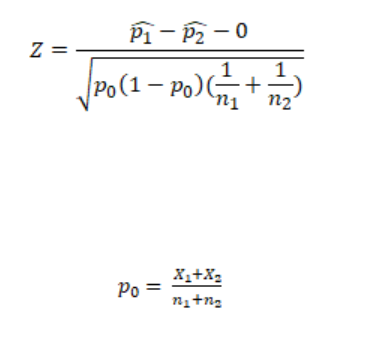

In [121]:
"""
We can make our own python function to compute a two sample proportion test (based on normal approximation)
"""

def two_sample_prop_test(x1, n1, x2, n2, alternative='two-sided', alpha=0.05):
    p_0 = (x1 + x2) / (n1 + n2)
    p1 = x1/n1
    p2 = x2/n2
    
    z = (p1 - p2) / (np.sqrt(p_0 * (1 - p_0) * (1/n1 + 1/n2)))  # pooled proportion z score
    pval = stats.norm.cdf(z)
    
    if alternative == 'two-sided':
        pval *= 2
    
    print("p-value:", pval)
    
two_sample_prop_test(12, 500, 20, 600)

p-value: 0.35907205345169535


__Example 9.9.2__ (Workers productivity data using R) A production manager of a manufacturing company claims that over the last 10 years, worker productivity in the company did not vary more than 2%. To verify the manager’s claim, the CEO of the company collected the information on worker’s yearly productivity over the last 10-year period, as follows:

`103 99 109 96 94 106 94 95 99 108`

The manager wishes to test, at the 5% level of significance, the hypothesis
$H_0 : σ = σ_0 = 2$ versus $H_1 : σ = σ_1 > 2$

In [198]:
"""
We can make our own chi-squared test for variance
"""

def chi_square_var(x, sigma, alternative, conf_level):
    N = len(x)
    s = np.std(x, ddof=1)
    T_statistic = (N - 1) * (s / sigma)**2
    print("Test Statisitic:", T_statistic)
    
    if alternative == 'smaller':
        if T_statistic < stats.chi2.ppf(1 - conf_level, df=N - 1):
            print("p-value:", stats.chi2.cdf(T_statistic, df=N - 1))
            print("Reject the null hypothesis, accept alternative hypothesis: true variance is smaller than", str(sigma**2))
    elif alternative == 'greater':
        if T_statistic > stats.chi2.ppf(conf_level, df=N - 1):
            print("p-value:", stats.chi2.cdf(-T_statistic, df=N - 1)) 
            print("Reject the null hypothesis, accept alternative hypothesis: true variance is greater than", str(sigma**2))
    else:
        if T_statistic < stats.chi2.ppf(conf_level / 2, df=N-1) or T_statistic < stats.chi2.ppf(1 - conf_level / 2, df=N-1):
            print("Reject the null hypothesis, accept alternative hypothesis: true variance is not equal to", str(sigma**2))
            
    
x = np.array([103,99,109,96,94,106,94,95,99,108])
chi_square_var(x=x, sigma=2, alternative='greater', conf_level=0.95)

Test Statisitic: 76.02499999999999
p-value: 0.0
Reject the null hypothesis, accept alternative hypothesis: true variance is greater than 4


__Example 9.10.2__ (Using Python) The CEO of the company in Example (9.9.2) now decides to compare his company’s (say company 1) productivity with that of another company (say company 2). The productivity of the companies over the same period for the workers yielded the sample observations:

Productivity 1: `103 99 109 96 94 106 94 95 99 108`

Productivity 2: `95 94 105 98 105 95 104 100 105 101`

Test at the 1% level of significance the hypothesis
$H_0 : σ^2_1 = σ^2_2$ versus $H_1 : σ^2_1 \neq σ^2_2$

In [220]:
"""
We can make our own function to perform an F-test in python
"""

def f_test_for_pop_vars(x1, x2, significance_level, alternative='two-sided'): 
    # F test statistic:
    F = np.var(x1, ddof=1) / np.var(x2, ddof=1)
    
    # degrees of freedoms for x1 and x2
    df1 = len(x1) - 1
    df2 = len(x2) - 1
    
    # p-value:
    p_val = scipy.stats.f.sf(F, df1, df2)
    if alternative == 'two-sided':
        p_val *= 2
    
    # result
    if p_val < significance_level:
        print("Reject null hypothesis, accept alternative hypothesis: true ratio of variances is not equal to 1.")
    else:
        print("Result was not significant at α =", str(significance_level), "so we CANNOT reject the null hypothesis.")
    
    # print, or output statements
    print("F:", F)
    print("Numerator Degrees of Freedom:", df1)
    print("Denominator Degrees of Freedom:", df2)
    print("p-value:", p_val)
    
    
# let's test our function out!
x1 = np.array([103, 99, 109, 96, 94, 106, 94, 95, 99, 108])
x2 = np.array([95, 94, 105, 98, 105, 95, 104, 100, 105, 101])

f_test_for_pop_vars(x1, x2, significance_level=0.01)

Result was not significant at α = 0.01 so we CANNOT reject the null hypothesis.
F: 1.6745594713656389
Numerator Degrees of Freedom: 9
Denominator Degrees of Freedom: 9
p-value: 0.45434102681523425
